In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data", 
                                       ("http://archive.ics.uci.edu/ml/machine-learning-databases"
                                        "/auto-mpg/auto-mpg.data"))
dataset_path

32768/30286 [================================] - 0s 2us/step


'/home/vahid/.keras/datasets/auto-mpg.data'

In [38]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df_raw = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

df = df_raw.copy()
df.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


## Clean the data

In [39]:
df.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [40]:
df = df.dropna()

df = df.reset_index(drop=True)

df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1
391,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [41]:
origin = df.pop('Origin')

type(origin)

pandas.core.series.Series

In [42]:
df['origin-1'] = (origin == 1)*1.0
df['origin-2'] = (origin == 2)*1.0
df['origin-3'] = (origin == 3)*1.0

df.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,origin-1,origin-2,origin-3
387,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
388,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
389,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
390,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
391,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [43]:
import sklearn
import sklearn.model_selection

df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8)

df_train.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,origin-1,origin-2,origin-3
192,22.5,6,232.0,90.0,3085.0,17.6,76,1.0,0.0,0.0
235,30.5,4,98.0,63.0,2051.0,17.0,77,1.0,0.0,0.0
125,19.0,6,232.0,100.0,2901.0,16.0,74,1.0,0.0,0.0
294,27.4,4,121.0,80.0,2670.0,15.0,79,1.0,0.0,0.0
112,21.0,6,155.0,107.0,2472.0,14.0,73,1.0,0.0,0.0


In [44]:
train_stats = df_train.describe().transpose()

train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.393610,8.043644,9.0,16.9,22.3,29.5,46.6
Cylinders,313.0,5.511182,1.715513,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,195.880192,105.117620,70.0,105.0,151.0,302.0,455.0
Horsepower,313.0,105.070288,39.178931,46.0,75.0,95.0,129.0,230.0
Weight,313.0,3002.610224,868.417690,1613.0,2223.0,2868.0,3632.0,5140.0
Acceleration,313.0,15.571246,2.782328,8.0,13.8,15.5,17.0,24.8
Model Year,313.0,76.012780,3.602861,70.0,73.0,76.0,79.0,82.0
origin-1,313.0,0.619808,0.486211,0.0,0.0,1.0,1.0,1.0
origin-2,313.0,0.172524,0.378440,0.0,0.0,0.0,0.0,1.0
origin-3,313.0,0.207668,0.406287,0.0,0.0,0.0,0.0,1.0


 * Normalize train and test

In [54]:
df_train_norm = (df_train - train_stats['mean']) / train_stats['std']

df_test_norm = (df_test - train_stats['mean']) / train_stats['std']

df_test_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,79.0,0.032268,0.847911,-1.540795,-0.658111,0.050523,0.572674,2.163993
Cylinders,79.0,-0.113509,0.972472,-1.463809,-0.880892,-0.880892,0.284940,1.450772
Displacement,79.0,-0.069306,0.981767,-1.216544,-0.883583,-0.531597,0.514850,2.322349
Horsepower,79.0,-0.076104,0.913064,-1.507705,-0.601606,-0.333605,0.189635,2.805837
Weight,79.0,-0.142996,0.882702,-1.415920,-0.878161,-0.394522,0.534754,2.007548
Acceleration,79.0,-0.053359,0.962458,-2.541485,-0.618635,-0.025607,0.657275,1.951155
Model Year,79.0,-0.045708,1.112973,-1.668890,-1.113776,-0.003547,0.829125,1.661796
origin-1,79.0,0.052984,0.990098,-1.274772,-1.274772,0.781948,0.781948,0.781948
origin-2,79.0,0.012396,1.015459,-0.455882,-0.455882,-0.455882,-0.455882,2.186544
origin-3,79.0,-0.074953,0.945860,-0.511135,-0.511135,-0.511135,-0.511135,1.950178


 * Separate labels and features

In [90]:
y_train = df_train_norm.pop('MPG')

y_test = df_test_norm.pop('MPG')

### Create a dataset for training

In [104]:
ds_train = tf.data.Dataset.from_tensor_slices((np.asarray(df_train_norm), np.asarray(y_train)))

ds_train = ds_train.shuffle(buffer_size=len(df_train_norm))
ds_train = ds_train.batch(batch_size=8)
ds_train = ds_train.repeat()

### testing:
batch = next(iter(ds_train))
print('Features: ', batch[0].shape, 'Labels: ', batch[1].shape)

Features:  (8, 9) Labels:  (8,)


## Build the model

In [113]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation=None))

## testing
x = np.asarray(df_train_norm.iloc[0, :]).reshape(1, -1)
print(x)
print(model(x))

model.summary()

[[-0.88089245 -0.95017555 -0.92065523 -0.93688813  0.87292147 -1.11377593
  -1.27477199  2.18654354 -0.51113541]]
tf.Tensor([[1.02111354]], shape=(1, 1), dtype=float64)
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             multiple                  320       
_________________________________________________________________
dense_73 (Dense)             multiple                  1056      
_________________________________________________________________
dense_74 (Dense)             multiple                  33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [112]:
## Determining the input-shape: method 2
## Specify either :
##       input_shape=(8,)
##       input_dim = 8
##       batch_input_shape = (None, 8)

inp_shape = df_train_norm.shape[1]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', batch_input_shape=(None, inp_shape)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation=None))

## testing
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                320       
_________________________________________________________________
dense_70 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [132]:
## Determining the input-shape: method 3


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation=None))

## testing
model.build((None, df_train_norm.shape[1]))
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             multiple                  320       
_________________________________________________________________
dense_82 (Dense)             multiple                  1056      
_________________________________________________________________
dense_83 (Dense)             multiple                  33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [133]:


model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])


In [134]:
## Ways to do prediction:

batch = next(iter(ds_train))

model.predict(batch[0]), model(batch[0])

(array([[-0.4304382 ],
        [-0.3792558 ],
        [-0.4548967 ],
        [ 0.02114886],
        [ 0.03454936],
        [-0.25267154],
        [-0.08182041],
        [-0.5924811 ]], dtype=float32),
 <tf.Tensor: id=849443, shape=(8, 1), dtype=float32, numpy=
 array([[-0.4304382 ],
        [-0.3792558 ],
        [-0.4548967 ],
        [ 0.02114886],
        [ 0.03454936],
        [-0.25267154],
        [-0.08182041],
        [-0.5924811 ]], dtype=float32)>)

## Train the model

In [135]:
EPOCHS = 1000
batch_size = 8
steps_per_epoch = np.ceil(len(df_train_norm) / batch_size)

ds_train = tf.data.Dataset.from_tensor_slices((np.asarray(df_train_norm), np.asarray(y_train)))
ds_train = ds_train.shuffle(buffer_size=len(df_train_norm))
ds_train = ds_train.batch(batch_size=8)
ds_train = ds_train.repeat()


class Progress(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch%10 == 0:
            print('.', end='')


history = model.fit(ds_train,
                    epochs=EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    verbose=0, callbacks=[Progress()])

....................................................................................................

In [136]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,epoch
995,0.009521,0.064596,0.009521,995
996,0.010063,0.067624,0.010063,996
997,0.010407,0.062890,0.010407,997
998,0.010849,0.071619,0.010849,998
999,0.010472,0.068044,0.010472,999


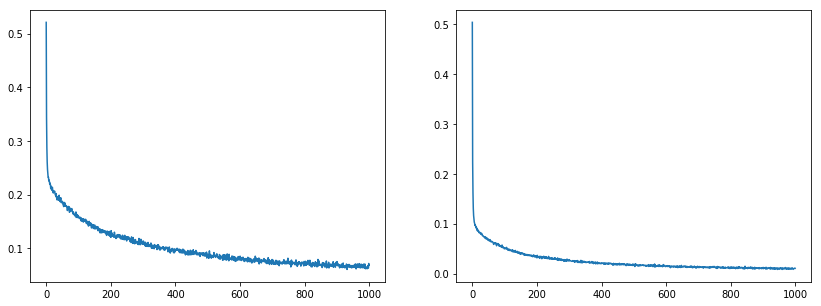

In [138]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')

ax = fig.add_subplot(1, 2, 2)
plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')

plt.show()

## Valiation-set

In [140]:
EPOCHS = 1000
batch_size = 8
steps_per_epoch = np.ceil(len(df_train_norm) / batch_size)

# -------------

inp_shape = df_train_norm.shape[1]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', batch_input_shape=(None, inp_shape)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation=None))

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

# -------------

class Progress(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch%10 == 0:
            print('.', end='')


history = model.fit(x=df_train_norm, y=y_train,
                    validation_split=0.2, 
                    batch_size=batch_size, epochs=EPOCHS, 
                    verbose=0, callbacks=[Progress()])



....................................................................................................

In [142]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.008455,0.057493,0.008455,0.157376,0.305203,0.157376,995
996,0.009010,0.059963,0.009010,0.160545,0.303997,0.160545,996
997,0.008936,0.059174,0.008936,0.161537,0.307390,0.161537,997
998,0.008555,0.058766,0.008555,0.162563,0.296496,0.162563,998
999,0.008949,0.057842,0.008949,0.155803,0.295185,0.155803,999


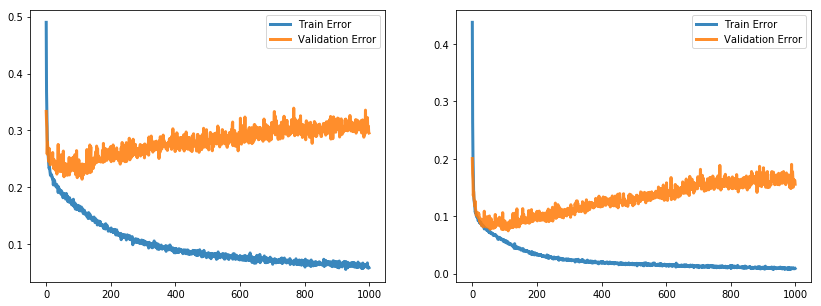

In [146]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(hist['epoch'], hist['mae'], lw=3, alpha=0.88,
           label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], lw=3, alpha=0.88,
           label='Validation Error')
plt.legend()


ax = fig.add_subplot(1, 2, 2)
plt.plot(hist['epoch'], hist['mse'], lw=3, alpha=0.88,
           label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], lw=3, alpha=0.88,
           label='Validation Error')
plt.legend()
plt.show()

```
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs)
```